# <center>A Simple Representative Growth Model<center>
# Brock and Mirman(1972)

The social planner solves the following problem:

$$
\begin{gathered}
\max _{\left\{c_{t}, k_{t+1}\right\}} \sum_{t=0}^{\infty} \beta^{t} \log \left(c_{t}\right) \\
c_{t}+k_{t+1} \leq A k_{t}^{\alpha} \\
k_{0} \text { given, } c_{t}, k_{t} \geq 0 \text { for all } t
\end{gathered}
$$

The controls are $c_{t}$ and $k_{t+1}$, and the only state is $k_{t}$. We can reformulate the previous problem as a dynamic programming problem as follows:


$$
V(k)=\max _{k^{\prime}}\left\{\log \left(A k^{\alpha}-k^{\prime}\right)+\beta V\left(k^{\prime}\right)\right\}
$$

If we solve for capital stock policy rule $k^{\prime}=g_{k}(k)$, we can obtain the policy function for consumption $c=g_{c}(k)$ directly from the resource constraint:

$$
g_{c}(k)=A k^{\alpha}-g_{k}(k)
$$

## Step 1: Initialization of the parameters and steady state

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Model Parameters
alpha = 0.4
A = 5
beta = 0.9888

# Algorithm Parameters
T = 10 # periods to simulate
tolv = 1e-7 # tolerance

To compute the steady state, we use the equilibrium conditions:

$$
\begin{gathered}
\frac{1}{c}=\beta \frac{1}{c^{\prime}}\left(\alpha A k^{\prime \alpha-1}\right) \\
c+k^{\prime}=A k^{\alpha}
\end{gathered}
$$

Imposing $x=x^{\prime}$ for all variables, we get:

$$
\begin{gathered}
k_{s s}=\left(\frac{1}{\beta \alpha A}\right)^{\frac{1}{\alpha-1}} \\
c_{s s}=A k_{s s}^{\alpha}-k_{s s} \\
y_{s s}=A k_{s s}^{\alpha}
\end{gathered}
$$

In [3]:
k_ss = (1 / (beta*alpha*A))**(1 / (alpha - 1))
y_ss = A * k_ss ** alpha
c_ss = y_ss - k_ss
ku = (1 / A) ** (1 / (alpha - 1)) # if c =0 

print("k_ss=",k_ss)
print("k_u=", ku)

# 利用稳态提供一个初始的state , 而后计算upper bound : ku 提供一个upper bound

k_ss= 3.1157606561253433
k_u= 14.62008869106433


## Step 2: Creation of a grid for the states
Create a vector for $k$, with $l_{k}$ values i.e. $k \in\left[k_{1}<k_{2}<\ldots<k_{l_{k}}\right]$. The larger $l_{k}$, the better the approximation, but this increases the computing time. We can have the grid from 0 to $k_{l_{k}}$, or around the steady state, e.g. $\pm 10 \%$ of $k_{s s}$. 

In [4]:
# 创造格点
lk = 100
k_min = 0.95 * k_ss
k_max = 1.01 * k_ss
k = np.linspace(k_min, k_max, num=lk)

print(k)

[2.95997262 2.96186096 2.9637493  2.96563764 2.96752598 2.96941432
 2.97130266 2.973191   2.97507934 2.97696768 2.97885602 2.98074436
 2.9826327  2.98452104 2.98640938 2.98829772 2.99018606 2.9920744
 2.99396274 2.99585108 2.99773942 2.99962776 3.0015161  3.00340444
 3.00529278 3.00718112 3.00906946 3.0109578  3.01284614 3.01473448
 3.01662282 3.01851116 3.0203995  3.02228784 3.02417618 3.02606452
 3.02795286 3.0298412  3.03172954 3.03361788 3.03550621 3.03739455
 3.03928289 3.04117123 3.04305957 3.04494791 3.04683625 3.04872459
 3.05061293 3.05250127 3.05438961 3.05627795 3.05816629 3.06005463
 3.06194297 3.06383131 3.06571965 3.06760799 3.06949633 3.07138467
 3.07327301 3.07516135 3.07704969 3.07893803 3.08082637 3.08271471
 3.08460305 3.08649139 3.08837973 3.09026807 3.09215641 3.09404475
 3.09593309 3.09782143 3.09970977 3.10159811 3.10348645 3.10537479
 3.10726313 3.10915147 3.11103981 3.11292815 3.11481649 3.11670483
 3.11859317 3.12048151 3.12236985 3.12425819 3.12614652 3.12803

## Step 3: Computation of the return function

For each value of $k$ and $k^{\prime}$ in the grid we need:

$$
\begin{aligned}
c &=A k^{\alpha}-k^{\prime} \\
U(c) &=\log (c)
\end{aligned}
$$

$U$ is of dimension $g_{k} \times 1$, where $g_{k}=l_{k} \times l_{k}$. If $l_{k}=2$ :

$$
\begin{aligned}
& \leftarrow k^{\prime} \longrightarrow \\
& \begin{aligned}&\uparrow \\& k \\&\downarrow\end{aligned}\left[\begin{array}{l}c_{11} \\c_{12} \\c_{21} \\c_{22}\end{array}\right] \\
 c_{i j}=A k_{i}^{\alpha}-k_{j}  & \text{ for } i=1: l_{k} \text { and } j=1: l_{k} 
\end{aligned}
$$

In [5]:
gk = lk * lk  # dimension of U

c = np.zeros((gk))
for i in range(lk):
    for j in range(lk):
        c[i*lk+j] = A * (k[i] ** alpha) - k[j] # c[i*lk+j] indicates c_{ij}
        if c[i*lk+j] < 0:
            c[i*lk+j] = tolv
print(c)

[4.75767743 4.75578909 4.75390075 ... 4.76590602 4.76401768 4.76212934]


Finally, to calculate the return function, we simply take the log of the consumption vector:

In [6]:
u = np.log(c)
print(u)

[1.55975961 1.55936263 1.55896549 ... 1.56148766 1.56109136 1.56069491]


## Step 4: Initialization and computation of the optimal value function

Our candidate value function is an $l_{k} \times 1$ vector:
$$
V(k)=\left[\begin{array}{c}
V\left(k_{1}\right) \\
V\left(k_{2}\right) \\
\vdots \\
V\left(k_{l_{k}}\right)
\end{array}\right]
$$

We can initialize $V_{0}$ with a vector of zeros of dimension $l_{k}$.

We also need to initialize the contraction mapping operator $V_{1}=T\left(V_{0}\right)$. In iteration $n$, it returns:

$$
V_{n}\left(k_{i}\right)=\max _{k^{\prime}}\left\{\left[\begin{array}{c}
U\left(A k_{i}-k_{1}^{\prime}\right) \\
U\left(A k_{i}-k_{2}^{\prime}\right)
\end{array}\right]+\beta\left[\begin{array}{c}
V_{n-1}\left(k_{1}^{\prime}\right) \\
V_{n-1}\left(k_{2}^{\prime}\right)
\end{array}\right]\right\}
$$

In each iteration: 
- Set $V_{0}$ to be the $V_{1}$ computed from the previous iteration.
- For each $k_{i}$, compute $U(c)+\beta V_{0}\left(k^{\prime}\right)$ and choose the maximum over $k^{\prime}$ and call it $V_{1}$ (Use the max operator).
- Compare $V_{0}$ with $V_{1}$ and, if the difference is sufficiently small, stop (Use the norm of $V_{1}-V_{0}$ ).

In [8]:
# Initialize value function and operator and iterate
V0 = np.ones((lk)) # 这是个一维矩阵！
V1 = np.zeros((lk))

while abs(np.linalg.norm(V1 - V0)) > tolv:
    V0 = np.copy(V1) # Attention! Use deepcopy here to avoid shallow copy.
    for i in range(lk):
        vtemp = u[i*lk:(i+1)*lk] + beta * V0 # note that in python index starts from 0.
        #print(vtemp)
        # vtemp 也是一个100维的向量，代表了从i到其他所有状态的value function的值:即i*lk -> (i+1)*lk
        # 最后估计出了每个状态自身的状态价值
        V1[i] = np.max(vtemp)
V0 = np.copy(V1)
print(V0)

[139.30896111 139.3093831  139.30980484 139.31022632 139.31064752
 139.31106849 139.31148913 139.31190957 139.3123297  139.31274961
 139.31316924 139.31358856 139.31400769 139.31442648 139.314845
 139.31526329 139.3156813  139.3160991  139.31651656 139.3169338
 139.31735077 139.31776745 139.31818392 139.31860007 139.31901604
 139.31943169 139.31984704 139.32026219 139.32067707 139.32109174
 139.32150608 139.32192016 139.32233401 139.32274754 139.32316086
 139.3235739  139.32398674 139.32439929 139.32481152 139.32522358
 139.32563533 139.32604691 139.32645818 139.32686914 139.32727993
 139.3276904  139.32810065 139.32851064 139.32892038 139.32932989
 139.32973908 139.33014807 139.33055679 139.3309653  139.33137355
 139.33178148 139.33218921 139.33259667 139.33300389 139.33341088
 139.33381755 139.33422407 139.33463028 139.33503619 139.33544193
 139.33584736 139.33625262 139.33665758 139.33706228 139.33746678
 139.33787099 139.33827503 139.33867875 139.33908225 139.33948552
 139.33988847

## Step 5: Computation of the optimal policy functions
To calculate $g_{k}(k)$, for each point in the grid, find the index where $U(c)+\beta V^{*}\left(k^{\prime}\right)$ takes its maximum value when $V^{*}$ is used.

The element optim[i] gives the index of the $k^{\prime}$ maximizer when the initial capital is $k_{i}$.

In [9]:
optim = np.zeros(lk,dtype="int") # "int" type for index. 
for i in range(lk):
    # 然后算出每个状态应该往哪个状态转移是最优的
    vtemp = u[i*lk:(i+1)*lk] + beta * V0
    optim[i] = np.argmax(vtemp)
print(optim)

[49 49 50 50 51 51 51 52 52 53 53 54 54 54 55 55 56 56 56 57 57 58 58 58
 59 59 60 60 61 61 61 62 62 62 63 63 64 64 64 65 65 66 66 67 67 67 68 68
 69 69 69 70 70 71 71 71 72 72 73 73 74 74 74 75 75 75 76 76 77 77 78 78
 78 79 79 79 80 80 81 81 81 82 82 83 83 84 84 84 85 85 86 86 86 87 87 87
 88 88 89 89]


The policy functions are given by:

$$
\begin{aligned}
&\text{polk}=\left[\begin{array}{l}
g_{k}\left(k_{1}\right) \\
g_{k}\left(k_{2}\right)
\end{array}\right] \text { and polc }=\left[\begin{array}{l}
g_{c}\left(k_{1}\right) \\
g_{c}\left(k_{2}\right)
\end{array}\right] \\
&\text { polc }=A\left[\begin{array}{l}
k_{1} \\
k_{2}
\end{array}\right]^{\alpha}-\left[\begin{array}{l}
g_{k}\left(k_{1}\right) \\
g_{k}\left(k_{2}\right)
\end{array}\right]
\end{aligned}
$$

In [10]:
polk = k[optim]
polc = A * k ** alpha - polk

print(polk)
print(polc)

[3.05250127 3.05250127 3.05438961 3.05438961 3.05627795 3.05627795
 3.05627795 3.05816629 3.05816629 3.06005463 3.06005463 3.06194297
 3.06194297 3.06194297 3.06383131 3.06383131 3.06571965 3.06571965
 3.06571965 3.06760799 3.06760799 3.06949633 3.06949633 3.06949633
 3.07138467 3.07138467 3.07327301 3.07327301 3.07516135 3.07516135
 3.07516135 3.07704969 3.07704969 3.07704969 3.07893803 3.07893803
 3.08082637 3.08082637 3.08082637 3.08271471 3.08271471 3.08460305
 3.08460305 3.08649139 3.08649139 3.08649139 3.08837973 3.08837973
 3.09026807 3.09026807 3.09026807 3.09215641 3.09215641 3.09404475
 3.09404475 3.09404475 3.09593309 3.09593309 3.09782143 3.09782143
 3.09970977 3.09970977 3.09970977 3.10159811 3.10159811 3.10159811
 3.10348645 3.10348645 3.10537479 3.10537479 3.10726313 3.10726313
 3.10726313 3.10915147 3.10915147 3.10915147 3.11103981 3.11103981
 3.11292815 3.11292815 3.11292815 3.11481649 3.11481649 3.11670483
 3.11670483 3.11859317 3.11859317 3.11859317 3.12048151 3.1204

## Testing our approximation
The analytical solution to the model is:
$$
\begin{gathered}
v(k)=(1-\beta)^{-1}\left[\ln (A(1-\alpha \beta))+\frac{\alpha \beta}{1-\alpha \beta} \ln (A \alpha \beta)\right]+\frac{\alpha}{1-\alpha \beta} \ln (k) \\
k^{\prime}=g_{k}(k)=\alpha \beta A k^{\alpha} \\
c=g_{c}(k)=(1-\alpha \beta) A k^{\alpha}
\end{gathered}
$$
To test our approximation, we compare the differences between the analytical and numerical solution. 

In [11]:
# True value functions
a = (1/(1-beta))*(np.log(A*(1-alpha*beta))+alpha*beta*np.log(A*alpha*beta)/(1-alpha*beta))
b = alpha/(1-alpha*beta)
Vk = a + b * np.log(k)
dist = np.linalg.norm(Vk-V0)
print("Distance between true and approx. value function:",dist)

Distance between true and approx. value function: 2.4666910677622458e-05


Text(0.5, 1.0, 'True and Approximated value function')

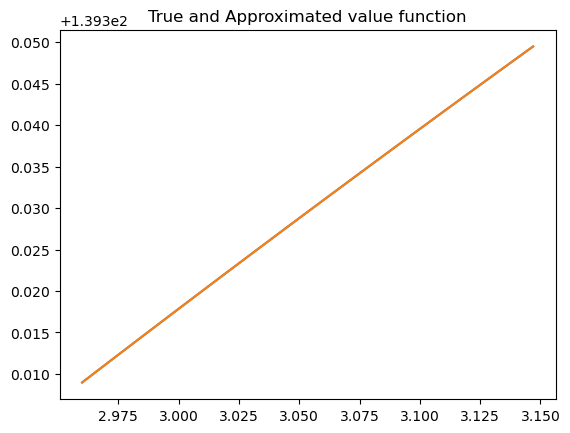

In [12]:
plt.plot(k, V0)
plt.plot(k, Vk)
plt.title("True and Approximated value function")

## Simulating the model

(1) Choose an initial value for $k_{0}$. To do this, select a number between 1 and $I_{k}$, indicating the position in the initial capital in the grid. Given this position, we use the capital policy function to extract the optimal first period capital.

(2) We then create a loop that:
- given the position of $k_{0}$, finds the position of the optimal next period capital that corresponds to it.
- uses the initial capital and the position of the new optimal capital to calculate the values of output, consumption, and the next period capital, using the optimal policy vectors. 

**Tips:** We need lk = 100 (lk = 2 is too small) to demonstrate the proper picture. To achieve this: change lk in step 2, choose the next cell, click Cell-Run All Above, then rerun the next cell.

Text(0.5, 1.0, 'Convergence of output towards its steady state')

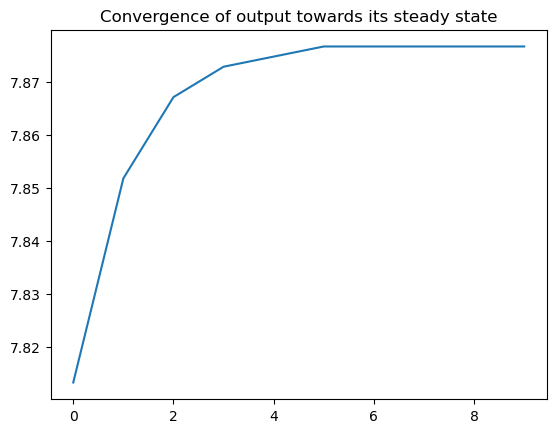

In [11]:
indk = 0
kopt = np.zeros(T+1)
output = np.zeros(T)
cons = np.zeros(T)

kopt[0] = polk[indk]

for i in range(T):
    indk = optim[indk]
    output[i] = A * kopt[i] ** alpha
    kopt[i+1] = polk[indk]
    cons[i] = output[i]-kopt[i+1]
    
plt.plot(range(T), output)
plt.title("Convergence of output towards its steady state")

Text(0.5, 1.0, 'Convergence of capital towards its steady state')

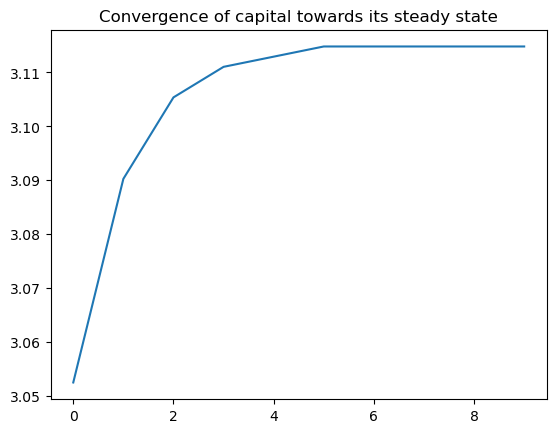

In [12]:
plt.plot(range(T), kopt[:T])
plt.title("Convergence of capital towards its steady state")

Text(0.5, 1.0, 'Convergence of consumption towards its steady state')

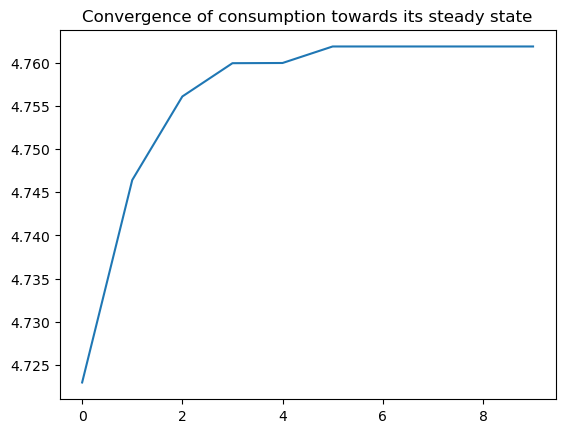

In [13]:
plt.plot(range(T), cons)
plt.title("Convergence of consumption towards its steady state")

# Brock and Mirman with iid shocks

The social planner solves the following problem:

$$
\begin{gathered}
\max _{\left\{c_{t}, k_{t+1}\right\}} E_{0} \sum_{t=0}^{\infty} \beta^{t} \log \left(c_{t}\right) \text { s.t. } \\
c_{t}+k_{t+1} \leq \theta_{t} k_{t}^{\alpha} \\
\theta_{t} \in\left[\theta_{1}, \theta_{2}\right] \text { and } \operatorname{Pr}\left(\theta_{t}=\theta_{1}\right)=\operatorname{Pr}\left(\theta_{t}=\theta_{2}\right)=0.5 \\
k_{0}, \theta_{0} \text { given, } c_{t}, k_{t} \geq 0 \text { for all } t
\end{gathered}
$$
$\theta_{t}$ 全要素生产率 模拟了宏观冲击
The controls are $c_{t}$ and $k_{t+1}$, and the states are $k_{t}$ and $\theta_{t}$. 

We can reformulate the previous problem as a dynamic programming problem as follows:

$$
V(k, \theta)=\max _{k^{\prime}}\left\{\log \left(\theta_{t} k^{\alpha}-k^{\prime}\right)+\beta E V\left(k^{\prime}, \theta^{\prime}\right)\right\}
$$

We have to solve for:

$$
\begin{aligned}
k^{\prime} &=g_{k}(k, \theta) \\
g_{c}(k, \theta) &=\theta k^{\alpha}-g_{k}(k, \theta)
\end{aligned}
$$

## Step 1: Initialization of the parameters and steady state

In [14]:
# Model Parameters
alpha = 0.4
beta = 0.9888

# Algorithm Parameters
T = 100 # periods to simulate
tolv = 1e-7 # tolerance

To calculate the steady state, we use the following equations:

$$
\begin{gathered}
\frac{1}{c}=\beta E \frac{1}{c^{\prime}}\left(\alpha \theta^{\prime} k^{\prime \alpha-1}\right) \\
c+k^{\prime}=k^{\alpha}
\end{gathered}
$$

Imposing $E\left(\theta^{\prime}\right)=E(\theta)=1$ and $x=x^{\prime}$ for all variables, we get:

$$
\begin{gathered}
k_{s s}=\left(\frac{1}{\beta \alpha}\right)^{\frac{1}{\alpha-1}} \\
c_{s s}=k_{s s}^{\alpha}-k_{s s} \\
y_{s s}=k_{s s}^{\alpha}
\end{gathered}
$$


In [15]:
# steady state
k_ss = (1 / (beta*alpha))**(1 / (alpha - 1))
y_ss = k_ss ** alpha
c_ss = y_ss - k_ss

print("k_ss=",k_ss)

k_ss= 0.21311503110303762


## Step 2: Creation of a grid for the states
Create a grid vector for $\theta$ and $k$ with $l_{\theta}$ and $l_{k}$ values $\theta \in\left[\theta_{1}<\theta_{2}<\ldots<\theta_{l_{\theta}}\right]$ and $k \in\left[k_{1}<k_{2}<\ldots<k_{l_{k}}\right]$

In [16]:
lt = 2
theta = np.linspace(1 + 1.625/100, 1-1.625/100, num=lt)
print(theta)

lk = 100
k_min = 0.96 * k_ss
k_max = 1.04 * k_ss
k = np.linspace(k_min, k_max, num=lk)
print(k)


[1.01625 0.98375]
[0.20459043 0.20476264 0.20493486 0.20510707 0.20527929 0.2054515
 0.20562371 0.20579593 0.20596814 0.20614036 0.20631257 0.20648479
 0.206657   0.20682921 0.20700143 0.20717364 0.20734586 0.20751807
 0.20769028 0.2078625  0.20803471 0.20820693 0.20837914 0.20855136
 0.20872357 0.20889578 0.209068   0.20924021 0.20941243 0.20958464
 0.20975685 0.20992907 0.21010128 0.2102735  0.21044571 0.21061793
 0.21079014 0.21096235 0.21113457 0.21130678 0.211479   0.21165121
 0.21182342 0.21199564 0.21216785 0.21234007 0.21251228 0.2126845
 0.21285671 0.21302892 0.21320114 0.21337335 0.21354557 0.21371778
 0.21388999 0.21406221 0.21423442 0.21440664 0.21457885 0.21475107
 0.21492328 0.21509549 0.21526771 0.21543992 0.21561214 0.21578435
 0.21595656 0.21612878 0.21630099 0.21647321 0.21664542 0.21681764
 0.21698985 0.21716206 0.21733428 0.21750649 0.21767871 0.21785092
 0.21802313 0.21819535 0.21836756 0.21853978 0.21871199 0.21888421
 0.21905642 0.21922863 0.21940085 0.21957306 0

## Step 3: Computation of the return function

For each value of $\theta, k$ and $k^{\prime}$, calculate:

$$
\begin{gathered}
c=\theta k^{\alpha}-k^{\prime} \\
U(c)=\log (c)
\end{gathered}
$$

Create a matrix of dimensions $g_{k} \times l_{\theta}$, where $g_{k}=l_{k} \times l_{k}$. If $I_{k}=2$ and $l_{\theta}=2$ :

$$
\begin{aligned}
&  \quad \quad \theta_{1}\quad \quad  \quad \quad \quad \theta_{2} \\
& \longleftarrow k^{\prime} \longrightarrow \quad \quad \longleftarrow k^{\prime} \longrightarrow \\
& \begin{gathered}\uparrow \\ k\\ \downarrow\end{gathered}
\left[\begin{array}{l}c_{11} \\c_{12} \\c_{21} \\c_{22}\end{array}\right] 
\quad \quad \quad \begin{gathered}\uparrow \\ k\\ \downarrow\end{gathered}
\left[\begin{array}{l}c_{11} \\c_{12} \\c_{21} \\c_{22}\end{array}\right]
\end{aligned}
$$

where

$$
c_{i j}\left(\theta_{t}\right)=\theta_{t} k_{i}^{\alpha}-k_{j} \text { for } i=1: l_{k}, j=1: l_{k} \text { and } t=1: 2
$$

We do it with a three dimensional loop on the indexes $t, i$ and $j$, where $t$ represents $\theta, i$ represents $k$ and $j$ represents $k^{\prime}$. Since consumption cannot be negative, we redefine $c=1 e-07$ whenever $c<0$.

In [17]:
gk = lk * lk
c = np.zeros((gk, lt))
for t in range(lt):
    for i in range(lk):
        for j in range(lk):
            c[i * lk + j][t] = theta[t] * k[i] ** alpha - k[j]
            if c[i * lk + j][t] < 0:
                c[i * lk + j][t] = tolv
print(c)

[[0.33411913 0.31689103]
 [0.33394692 0.31671881]
 [0.3337747  0.3165466 ]
 ...
 [0.33494135 0.31715273]
 [0.33476914 0.31698051]
 [0.33459692 0.3168083 ]]


To calculate the return function, we simply take the log of the consumption matrix:

In [18]:
u = np.log(c)

## Step 4: Initialization and computation of the optimal value function

Our candidate solution for the value function is an $l_{k} \times l_{\theta}$ matrix that will look at follows:

$$
V(k, \theta)=\left[\begin{array}{cc}
V\left(k_{1}, \theta_{1}\right) & V\left(k_{1}, \theta_{2}\right) \\
V\left(k_{2}, \theta_{1}\right) & V\left(k_{2}, \theta_{2}\right) \\
\vdots & \vdots \\
V\left(k_{l_{k}}, \theta_{1}\right) & V\left(k_{l_{k}}, \theta_{2}\right)
\end{array}\right]
$$

Initialize $V_{0}$ with a vector of zeros of dimension $l_{k} \times l_{\theta}$ and

$$
V_{1}=T\left(V_{0}\right)
$$

At iteration $n$, we calculate, for each $\left(\theta_{t}, k_{i}\right)$, the maximum over $k^{\prime}$ :

$$
V_{n}\left(k_{i}, \theta_t\right)=\max_{k^{\prime}}\left\{\left[\begin{array}{c}
U\left(\theta_t k_{i}-k_{1}^{\prime}\right) \\
U\left(\theta_t k_{i}-k_{2}^{\prime}\right)
\end{array}\right]+\beta\left[\begin{array}{c}
\sum_{m=1}^2 \frac{1}{2} V_{n-1}\left(k_{1}^{\prime}, \theta_m^{\prime}\right) \\
\sum_{m=1}^2 \frac{1}{2} V_{n-1}\left(k_{2}^{\prime},
\theta_m^{\prime}\right)
\end{array}\right]\right\}
$$


After the first iteration, we follow the steps before:

- Set $V_{0}$ to be the $V_{1}$ computed from the previous iteration.

- For each $\left(\theta_{t}, k_{i}\right)$, compute $U(c)+\beta E V_{0}\left(k^{\prime}, \theta^{\prime}\right)$ and choose the maximum over $k^{\prime}$ and call it $V_{1}$.

- Compare $V_{0}$ with $V_{1}$ and, if the difference is sufficiently small, stop (use the norm of $V_{1}-V_{0}$ ). 

In [19]:
# Initialize value function and operator and iterate
V0 = np.ones((lk, lt))
V1 = np.zeros((lk, lt))
p = np.array([0.5, 0.5])

while abs(np.linalg.norm(V1 - V0)) > tolv:
    V0 = np.copy(V1)
    for j in range(lt):
        for i in range(lk):
            vtemp = u[i*lk:(i+1)*lk,j] + beta * V0 @ p
            #print(vtemp)
            V1[i,j] = np.max(vtemp)
V0 = np.copy(V1)
print(V0)

[[-100.17641813 -100.2301881 ]
 [-100.17586141 -100.22963129]
 [-100.17530506 -100.22907506]
 [-100.17474929 -100.22851912]
 [-100.17419382 -100.22796378]
 [-100.17363895 -100.22740892]
 [-100.17308452 -100.22685445]
 [-100.17253053 -100.22630055]
 [-100.17197701 -100.22574694]
 [-100.17142389 -100.22519392]
 [-100.17087136 -100.22464132]
 [-100.17031922 -100.22408916]
 [-100.16976755 -100.22353759]
 [-100.16921639 -100.2229863 ]
 [-100.1686656  -100.22243558]
 [-100.16811538 -100.22188523]
 [-100.16756546 -100.22133536]
 [-100.16701611 -100.22078607]
 [-100.16646723 -100.22023712]
 [-100.16591873 -100.21968868]
 [-100.16537072 -100.21914067]
 [-100.16482309 -100.21859308]
 [-100.16427603 -100.21804606]
 [-100.16372937 -100.21749932]
 [-100.16318316 -100.21695315]
 [-100.16263746 -100.2164074 ]
 [-100.1620921  -100.21586207]
 [-100.1615473  -100.21531725]
 [-100.16100282 -100.21477276]
 [-100.16045887 -100.21422882]
 [-100.1599154  -100.21368538]
 [-100.15937229 -100.21314228]
 [-100.1

## Step 5: Computation of the optimal policy functions

For each point in the grid, we find the index of the capital maximizer using the max operator.

In [20]:
optim = np.zeros((lk,lt),dtype="int") # "int" type for index. 
for j in range(lt):
    for i in range(lk):
        vtemp = u[i*lk:(i+1)*lk,j] + beta * V0 @ p
        optim[i,j] = np.argmax(vtemp)
print(optim)

[[49 10]
 [50 10]
 [50 11]
 [51 11]
 [51 11]
 [51 12]
 [52 12]
 [52 13]
 [53 13]
 [53 13]
 [53 14]
 [54 14]
 [54 14]
 [55 15]
 [55 15]
 [55 16]
 [56 16]
 [56 16]
 [57 17]
 [57 17]
 [58 18]
 [58 18]
 [58 18]
 [59 19]
 [59 19]
 [60 20]
 [60 20]
 [60 21]
 [61 21]
 [61 21]
 [62 22]
 [62 22]
 [62 23]
 [63 23]
 [63 23]
 [64 24]
 [64 24]
 [65 24]
 [65 25]
 [65 25]
 [66 26]
 [66 26]
 [67 26]
 [67 27]
 [67 27]
 [68 28]
 [68 28]
 [69 28]
 [69 29]
 [69 29]
 [70 30]
 [70 30]
 [71 30]
 [71 31]
 [71 31]
 [72 31]
 [72 32]
 [73 32]
 [73 33]
 [73 33]
 [74 33]
 [74 34]
 [75 34]
 [75 35]
 [76 35]
 [76 36]
 [76 36]
 [77 36]
 [77 37]
 [77 37]
 [78 37]
 [78 38]
 [79 38]
 [79 39]
 [80 39]
 [80 39]
 [80 40]
 [81 40]
 [81 41]
 [82 41]
 [82 41]
 [82 42]
 [83 42]
 [83 43]
 [84 43]
 [84 43]
 [84 44]
 [85 44]
 [85 44]
 [85 45]
 [86 45]
 [86 46]
 [87 46]
 [87 46]
 [87 47]
 [88 47]
 [88 48]
 [89 48]
 [89 48]
 [90 49]]


Using this matrix, the policy functions can be calculated as follows:

$$
\begin{gathered}
\text { polk }=\left[\begin{array}{ll}
g_{k}\left(k_{1}, \theta_{1}\right) & g_{k}\left(k_{1}, \theta_{2}\right) \\
g_{k}\left(k_{2}, \theta_{1}\right) & g_{k}\left(k_{2}, \theta_{2}\right)
\end{array}\right] \\
\text { polc }=\left[\begin{array}{ll}
g_{c}\left(k_{1}, \theta_{1}\right) & g_{c}\left(k_{1}, \theta_{2}\right) \\
g_{c}\left(k_{2}, \theta_{1}\right) & g_{c}\left(k_{2}, \theta_{2}\right)
\end{array}\right] \\
\text{polc}=\left[\begin{array}{ll}
\theta_{1} k_{1}^{\alpha} & \theta_{2} k_{1}^{\alpha} \\
\theta_{1} k_{2}^{\alpha} & \theta_{2} k_{2}^{\alpha}
\end{array}\right]-\left[\begin{array}{ll}
g_{k}\left(k_{1}, \theta_{1}\right) & g_{k}\left(k_{1}, \theta_{2}\right) \\
g_{k}\left(k_{2}, \theta_{1}\right) & g_{k}\left(k_{2}, \theta_{2}\right)
\end{array}\right]
\end{gathered}
$$

In [21]:
polk = k[optim]
print(polk)

[[0.21302892 0.20631257]
 [0.21320114 0.20631257]
 [0.21320114 0.20648479]
 [0.21337335 0.20648479]
 [0.21337335 0.20648479]
 [0.21337335 0.206657  ]
 [0.21354557 0.206657  ]
 [0.21354557 0.20682921]
 [0.21371778 0.20682921]
 [0.21371778 0.20682921]
 [0.21371778 0.20700143]
 [0.21388999 0.20700143]
 [0.21388999 0.20700143]
 [0.21406221 0.20717364]
 [0.21406221 0.20717364]
 [0.21406221 0.20734586]
 [0.21423442 0.20734586]
 [0.21423442 0.20734586]
 [0.21440664 0.20751807]
 [0.21440664 0.20751807]
 [0.21457885 0.20769028]
 [0.21457885 0.20769028]
 [0.21457885 0.20769028]
 [0.21475107 0.2078625 ]
 [0.21475107 0.2078625 ]
 [0.21492328 0.20803471]
 [0.21492328 0.20803471]
 [0.21492328 0.20820693]
 [0.21509549 0.20820693]
 [0.21509549 0.20820693]
 [0.21526771 0.20837914]
 [0.21526771 0.20837914]
 [0.21526771 0.20855136]
 [0.21543992 0.20855136]
 [0.21543992 0.20855136]
 [0.21561214 0.20872357]
 [0.21561214 0.20872357]
 [0.21578435 0.20872357]
 [0.21578435 0.20889578]
 [0.21578435 0.20889578]


## Simulating the model
(1) Choose an initial value for $k_{0}$ and $\theta_{0}$ and use the policy matrix to extract the optimal first period capital.

(2) We then create a loop that:

- given the initial capital and the initial shock, finds the position of the optimal next period capital.

- uses the initial capital, the initial shock index, and the position of the new optimal capital to calculate the values of output, consumption, and the next period capital, using the optimal policy matrices. It also generates a new shock index for next period.


In [22]:
indk = 1
shock = 1
kopt = np.zeros(T+1)
sho = np.zeros(T)
output = np.zeros(T)
cons = np.zeros(T)

kopt[0] = polk[indk,shock]

for i in range(T):
    indk = optim[indk,shock]
    sho[i] = theta[shock]
    kopt[i+1] = polk[indk,shock]
    output[i] = theta[shock] * kopt[i] ** alpha
    cons[i] = output[i]-kopt[i+1]
    shock = np.random.randint(0,2)

Text(0.5, 1.0, 'Simulation of all variables')

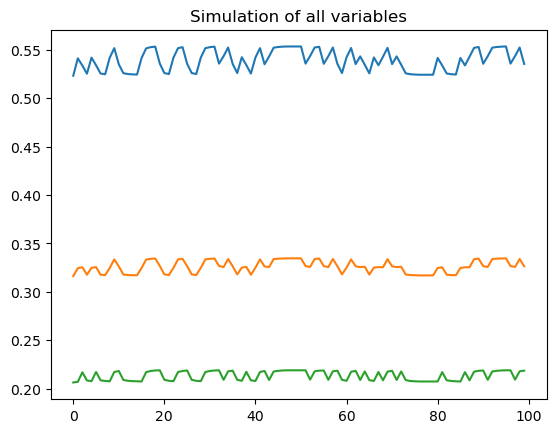

In [23]:
plt.plot(range(T), output)
plt.plot(range(T), cons)
plt.plot(range(T), kopt[:T])
plt.title("Simulation of all variables")

# Stochastic Growth Model with Markov Shocks

The social planner solves the following problem:

$$
\begin{gathered}
\max _{\left\{c_{t}, k_{t+1}\right\}} E_{0} \sum_{t=0}^{\infty} \beta^{t} \frac{c_{t}^{1-\gamma}}{1-\gamma} \text { s.t. } \\
c_{t}+i_{t} \leq \theta_{t} A k_{t}^{\alpha} \\
k_{t+1}=i_{t}+(1-\delta) k_{t} \\
k_{0}, \theta_{0} \text{ given, }c_{t}, k_{t} \geq 0 \text{ for all } t 
\end{gathered}
$$

The controls are $c_{t}, i_{t}$ and $k_{t+1}$ and the states are $k_{t}$ and $\theta_{t}$. The dynamic programming formulation is:

$$
V(k, \theta)=\max _{k^{\prime}}\left\{\log \left(\theta A k^{\alpha}-k^{\prime}+(1-\delta) k\right)+\beta E V\left(k^{\prime}, \theta^{\prime}\right)\right\}
$$

We have to solve for
$$
\begin{gathered}
k^{\prime}=g_{k}(k, \theta) \\
g_{c}(k, \theta)=\theta A k^{\alpha}+(1-\delta) k-g_{k}(k, \theta)
\end{gathered}
$$

## Step 1: Initialization of the parameters and steady state

In [112]:
import quantecon as qe

# Model and Algorithm Parameters
delta=0.1
alf=0.33
A=1
beta=0.9
gamma=2
tolv=1e-7

#Define the type of shock 
shock=2
if shock==1:# actually not right
    Pi=np.array([[0.8, 0.2],[0.2, 0.8]])
    print(Pi)
    
    teta_min = 0.9
    teta_max = 1.1
    inc = 0.2
    teta = np.arange(teta_min, teta_max, inc)
    print(teta)
elif shock==2:
    rho=0.95
    sigmae=0.00712
    # sigmain = sigmae*np.sqrt(1-rho**2)
    N=4
    m=3
    markov_chain=qe.markov.approximation.tauchen(rho,sigme,m=m, n=N)
    
    # transition matrix
    Pi = markov_chain.P
    Pit = Pi.T
    # print(Pit)

    # log state value
    log = markov_chain.state_values
    teta = np.exp(log)
    print(teta)

    # stationary distribution
    invdist = markov_chain.stationary_distributions.reshape(N, 1)[:,0]
    print(invdist)

lt = len(teta)

[0.97886651 0.99290529 1.00714541 1.02158976]
[0.05317954 0.44682046 0.44682046 0.05317954]


The equations determining the equilibrium of the model are given by:

$$
\begin{gathered}
c^{-\gamma}=\beta E\left(c^{\prime}\right)^{-\gamma}\left(\alpha \theta^{\prime} A k^{\prime \alpha-1}+1-\delta\right) \\
c+i=\theta A k^{\alpha} \\
i=k^{\prime}-(1-\delta) k
\end{gathered}
$$

Imposing $\theta_{s s}=E \theta^{\prime}=E \theta$ and $x=x^{\prime}$ for all variables we get:

$$
\begin{gathered}
k_{s s}=\left(\frac{1-\beta(1-\delta)}{\beta \alpha A \theta_{s s}}\right)^{\frac{1}{\alpha-1}} \\
i_{s s}=\delta k_{s s} \\
c_{s s}=\theta_{s s} A k_{s s}^{\alpha}-i_{s s} \\
y_{s s}=A \theta_{s s} k_{s s}^{\alpha}
\end{gathered}
$$

In [113]:
if shock == 2:
    Eteta = np.dot(invdist,teta)
    #print(Eteta)
else:
    Eteta = 1
k_ss = (A*Eteta*alf*beta/(1-beta*(1-delta)))** (1/(1-alf))
y_ss = Eteta * A * (k_ss ** alf)
i_ss = delta * k_ss
c_ss = y_ss - i_ss
print(k_ss)

1.9479907935492768


## Step 2: Creation of a grid for the states
Create a grid for the shock and for $k$ with $l_{k}$ values, i.e. $k \in\left[k_{1}<k_{2}<\ldots<k_{l_{k}}\right]$.

In [114]:
# Grid for capital
lk = 2
k_min = 0.975 * k_ss
k_max = 1.025 * k_ss
inc = (k_max - k_min)/(lk-1)
k = np.arange(k_min, k_max+1e-5, inc)
print(k)

[1.89929102 1.99669056]


## Step 3: Computation of the return function

For each $\theta, k$ and $k^{\prime}$, calculate the consumption and return functions from:

$$
\begin{aligned}
&c=\theta A k^{\alpha}-k^{\prime} \\
&U(c)=\frac{c^{1-\gamma}}{1-\gamma}
\end{aligned}
$$

If $l_{k}=2$ and $l_{\theta}=4$:

$$
\begin{aligned}
&  \quad \quad \theta_{1}\quad \quad  \quad \quad \quad \theta_{2} \\
& \longleftarrow k^{\prime} \longrightarrow \quad \quad \longleftarrow k^{\prime} \longrightarrow \\
& \begin{gathered}\uparrow \\ k\\ \downarrow\end{gathered}
\left[\begin{array}{l}c_{11} \\c_{12} \\c_{21} \\c_{22}\end{array}\right] 
\quad \quad \quad \begin{gathered}\uparrow \\ k\\ \downarrow\end{gathered}
\left[\begin{array}{l}c_{11} \\c_{12} \\c_{21} \\c_{22}\end{array}\right]
\end{aligned}
$$


$$
\begin{aligned}
&  \quad \quad \theta_{3}\quad \quad  \quad \quad \quad \theta_{4} \\
& \longleftarrow k^{\prime} \longrightarrow \quad \quad \longleftarrow k^{\prime} \longrightarrow \\
& \begin{gathered}\uparrow \\ k\\ \downarrow\end{gathered}
\left[\begin{array}{l}c_{11} \\c_{12} \\c_{21} \\c_{22}\end{array}\right] 
\quad \quad \quad \begin{gathered}\uparrow \\ k\\ \downarrow\end{gathered}
\left[\begin{array}{l}c_{11} \\c_{12} \\c_{21} \\c_{22}\end{array}\right]
\end{aligned}
$$


$$ c_{ij}=\theta_t A k_i^\alpha + (1-\delta)k_i - k_j \text { for } i=1: l_{k}, j=1: l_{k} \text { and } t=1: l_{\theta}$$ 

In [115]:
gk = lk * lk
c = np.zeros((gk, lt))
for t in range(lt):
    for i in range(lk):
        for j in range(lk):
            c[i * lk + j][t] = A * teta[t] * k[i] ** alf + (1-delta)*k[i] - k[j]
            if c[i * lk + j][t] < 0:
                c[i * lk + j][t] = tolv
print(c)

[[1.01971795 1.03706655 1.05466396 1.07251376]
 [0.92231841 0.93966701 0.95726442 0.97511422]
 [1.12750651 1.1451438  1.16303404 1.18118086]
 [1.03010697 1.04774426 1.0656345  1.08378132]]


To calculate the return function, take logs if $\gamma = 1$ or calculate $\frac{c^{1-\gamma}}{1-\gamma}$ otherwise

In [116]:
if gamma ==1:
    U = log(c)
else:
    U = c ** (1-gamma)/(1-gamma)
print(U)

[[-0.98066333 -0.96425827 -0.94816931 -0.93238897]
 [-1.08422427 -1.06420678 -1.04464344 -1.02552089]
 [-0.88691284 -0.87325277 -0.85982006 -0.8466104 ]
 [-0.97077297 -0.95443138 -0.93840805 -0.92269536]]


## Step 4: Initialization and computation of the optimal value function
Our candidate solution for the value function is an $l_{k} \times l_{\theta}$ matrix that will look at follows:
$$
V(k, \theta)=\left[\begin{array}{cccc}
V\left(k_{1}, \theta_{1}\right) & V\left(k_{1}, \theta_{2}\right) & V\left(k_{1}, \theta_{3}\right) & V\left(k_{1}, \theta_{l_{\theta}}\right) \\
V\left(k_{2}, \theta_{1}\right) & V\left(k_{2}, \theta_{2}\right) & V\left(k_{2}, \theta_{3}\right) & V\left(k_{2}, \theta_{l_{\theta}}\right) \\
\vdots & \vdots & \vdots & \vdots \\
V\left(k_{l_{k}}, \theta_{1}\right) & V\left(k_{l_{k}}, \theta_{2}\right) & V\left(k_{l_{k}}, \theta_{3}\right) & V\left(k_{l_{k}}, \theta_{l_{\theta}}\right)
\end{array}\right]
$$

Initialize $V_{0}$ with a vector of zeros of dimension $l_{k} \times l_{\theta}$ and $V_{1}=T\left(V_{0}\right)$


At each iteration $n$, calculate, for each pair $\left(\theta_{t}, k_{i}\right)$ in the grid, the maximum over $k^{\prime}$ of:

$$
\begin{aligned}
V_{n}\left(k_{i}, \theta_{t}\right)=& \max _{k^{\prime}}\left[\begin{array}{c}
U\left(\theta_{t} A k_{i}+(1-\delta) k_{i}-k_{1}^{\prime}\right) \\
U\left(\theta_{t} A k_{i}+(1-\delta) k_{i}-k_{2}^{\prime}\right)
\end{array}\right] \\
&+\beta\left[\begin{array}{l}
\sum_{m=1}^{l_{\theta}} P_{t m} V_{n-1}\left(k_{1}^{\prime}, \theta_{m}^{\prime}\right) \\
\sum_{m=1}^{l_{\theta}} P_{t m} V_{n-1}\left(k_{2}^{\prime}, \theta_{m}^{\prime}\right)
\end{array}\right]
\end{aligned}
$$

After the first iteration, follow the next steps:

- Set $V_{0}$ to be the $V_{1}$ computed from the previous iteration.

- For each $\left(k_{i}, \theta_{t}\right)$, compute $U(c)+\beta E V_{0}\left(k^{\prime}, \theta^{\prime}\right)$ and choose the maximum over $k^{\prime}$ and call it $V_{1}$.

- Compare $V_{0}$ with $V_{1}$ and, if the difference is sufficiently small, stop (use the norm of $V_{1}-V_{0}$ ) 

In [121]:
# Initialize of the value function
V0 = np.ones((lk, lt))
V1 = np.zeros((lk, lt))

while abs(np.linalg.norm(V1 - V0)) > tolv:
    V0 = np.copy(V1)
    for j in range(lt):
        for i in range(lk):
            vtemp = U[i*lk:(i+1)*lk,j] + beta * np.dot(V0, Pit[:, j])
            #print(vtemp)
            V1[i,j] = np.max(vtemp)
V0 = np.copy(V1)
print(V0)

[[-9.80194946 -9.64146466 -9.48283157 -9.32839645]
 [-9.70306393 -9.5432004  -9.38521451 -9.23144103]]


## Step 5: Computation of the optimal policy functions


In [125]:
optim = np.zeros((lk,lt),dtype="int") # "int" type for index. 
for j in range(lt):
    for i in range(lk):
        vtemp = U[i*lk:(i+1)*lk,j] + beta * np.dot(V0, Pit[:, j])
        optim[i,j] = np.argmax(vtemp)
print(optim)

[[0 0 0 0]
 [1 1 1 1]]


For each pair $\left(\theta_{j}, k_{i}\right)$, optim(i,j) is the index of the next period capital maximizer. 

If $l_k = 2$ and $l_\theta = 4$:

$$
\begin{aligned}
& \text { polk }=\left[\begin{array}{llll}g_{k}\left(k_{1}, \theta_{1}\right) & g_{k}\left(k_{1}, \theta_{2}\right) & g_{k}\left(k_{1}, \theta_{3}\right) & g_{k}\left(k_{1}, \theta_{4}\right) \\g_{k}\left(k_{2}, \theta_{1}\right) & g_{k}\left(k_{2}, \theta_{2}\right) & g_{k}\left(k_{2}, \theta_{3}\right) & g_{k}\left(k_{2}, \theta_{4}\right)\end{array}\right] \\
& \text { polc }=\left[\begin{array}{cccc}\theta_{1} k_{1}^{\alpha} & \theta_{2} k_{1}^{\alpha} & \theta_{3} k_{1}^{\alpha} & \theta_{4} k_{1}^{\alpha} \\\theta_{1} k_{2}^{\alpha} & \theta_{2} k_{2}^{\alpha} & \theta_{3} k_{2}^{\alpha} & \theta_{4} k_{2}^{\alpha}\end{array}\right]+(1-\delta)\left[\begin{array}{cccc}k_{1} & k_{1} & k_{1} & k_{1} \\k_{2} & k_{2} & k_{2} & k_{2}\end{array}\right]-\text { polk } 
\end{aligned}
$$

In [126]:
polk = k[optim]
print(polk)

[[1.89929102 1.89929102 1.89929102 1.89929102]
 [1.99669056 1.99669056 1.99669056 1.99669056]]


Actually Step 3-5 can use matrices instead of loops.

For each value of the shock, we create $l_{k} \times l_{k}$ consumption and utility submatrices. For example, if the shock is equal to $\theta_{t}$, and $l_{k}=2$ :

$$
\theta_{t} \\
\left[\begin{array}{cc} 
c_{11} & c_{21} \\
c_{12} & c_{22}
\end{array}\right]
$$

where $c_{i j}\left(\theta_{t}\right)=A \theta_{t} k_{i}^{\alpha}+(1-\delta) k_{i}-k_{j}$.

- The program uses the command find to locate the negative consumptions in each matrix and sets the utility equal to a high negative number (equivalent to setting the consumption to a very low number)

- For each level of the shock, it calculates the future value function futval, equal to $E V_{0}$, and selects the corresponding return submatrix $U$ to maximize $U+\beta E V_{0}$. If the shock is equal to $\theta_{t}$, and $I_{k}=2$, the program finds the maximum over $k^{\prime}$ of the following matrix:

$$
U\left(\begin{array}{cc}
c_{11}\left(\theta_{t}\right) & c_{21}\left(\theta_{t}\right) \\
c_{12}\left(\theta_{t}\right) & c_{22}\left(\theta_{t}\right)
\end{array}\right)+\beta\left[\begin{array}{c}
\sum_{m=1}^{l_{\theta}} P_{t m} V_{0}\left(k_{1}^{\prime}, \theta_{m}^{\prime}\right) \\
\sum_{m=1}^{l_{\theta}} P_{t m} V_{0}\left(k_{2}^{\prime}, \theta_{m}^{\prime}\right)
\end{array}\right]
$$

returning the vector $t_{1}$ with the maximized values, $t_{1}=\left[V_{1}\left(k_{1}, \theta_{1}\right)\right.$ $\left.V_{1}\left(k_{2}, \theta_{1}\right)\right]$, as well as a vector $t_{2}$ with the indexes of the next period capital maximizer. 

If $l_k=2$ and $\theta = \theta_4$. we obtain: $t_2 = [1,2]$



This indicates that, if $\theta= \theta_4$, the optimal next period capital is always equal to the initial one. Note that, for each value of the shock, the vectors $t_1$ and $t_2$ are appropriately located in the matrices $V$ and optim, which are the same as above.

## Simulating the model

(1) Choose an initial value for $k_0$ and $\theta_0$ and use the policy matrix to extract the optimal …rst period capital.

(2) We then create a loop that:

- given the initial capital and the initial shock, …nds the position of the optimal next period capital.

- uses the initial capital, the initial shock index, and the position of the new optimal capital to calculate the values of output, consumption, and the next period capital, using the optimal policy matrices. It also generates a new shock index for next period.

# Stochastic Growth Model with Irreversible Investment

The social planner solves the following problem:

$$
\begin{gathered}
\max _{\left\{c_{t}, k_{t+1}\right\}} E_{0} \sum_{t=0}^{\infty} \beta^{t} \frac{c_{t}^{1-\gamma}}{1-\gamma} \\
c_{t}+i_{t} \leq \theta_{t} A k_{t}^{\alpha} \\
k_{t+1}=i_{t}+(1-\delta) k_{t} \\
i_{t} \geq 0
\end{gathered}
$$

$k_{0}, \theta_{0}$ given, $c_{t}, k_{t} \geq 0$ for all $t$. 
The codes are basicly same as above, only with small modification in step 2.